<a href="https://colab.research.google.com/github/mutimrd2n/UL-Clustering/blob/main/UL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

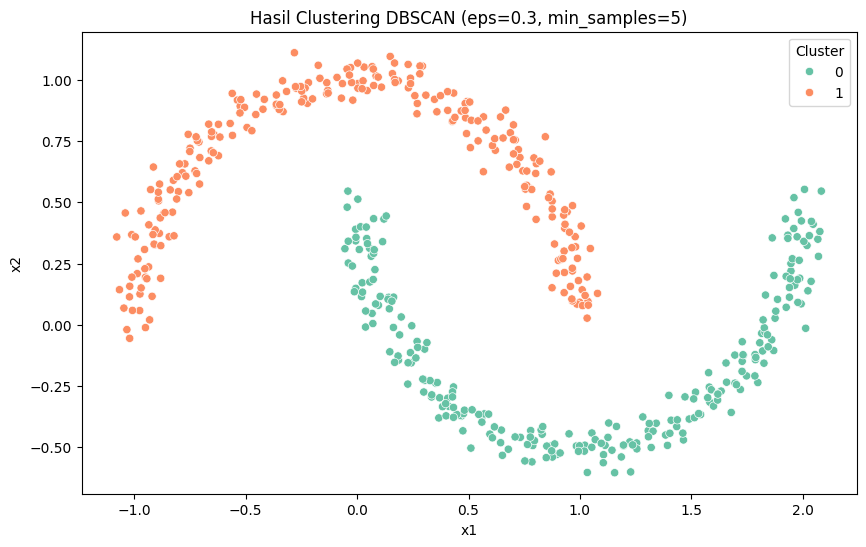

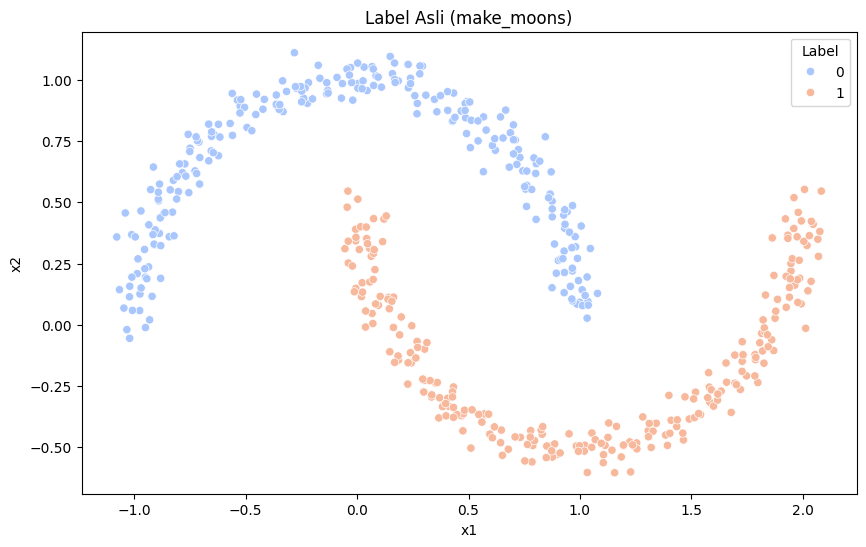


--- ANALISIS CLUSTER ---
Cluster 0: 250 titik
Cluster 1: 250 titik

Jumlah Outlier (Cluster -1): 0 titik

Adjusted Rand Index (ARI): 1.00


In [1]:
# 📦 Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

# 1. Buat dataset make_moons
X, y = make_moons(n_samples=500, noise=0.05, random_state=42)
df = pd.DataFrame(X, columns=["x1", "x2"])
df["label"] = y  # label asli (untuk evaluasi)

# 2. Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["x1", "x2"]])

# 3. DBSCAN
eps = 0.3
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X_scaled)
df["Cluster"] = clusters

# 4. Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="x1", y="x2", hue="Cluster", palette="Set2")
plt.title(f"Hasil Clustering DBSCAN (eps={eps}, min_samples={min_samples})")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(title="Cluster")
plt.show()

# 5. Visualisasi label asli
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="x1", y="x2", hue="label", palette="coolwarm")
plt.title("Label Asli (make_moons)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(title="Label")
plt.show()

# 6. 🔍 Analisis Hasil DBSCAN
print("\n--- ANALISIS CLUSTER ---")
unique, counts = np.unique(df["Cluster"], return_counts=True)
for u, c in zip(unique, counts):
    print(f"Cluster {u}: {c} titik")

outliers = (df["Cluster"] == -1).sum()
print(f"\nJumlah Outlier (Cluster -1): {outliers} titik")

# 7. 🧪 Evaluasi dengan label asli (opsional, karena dataset simulasi)
ari = adjusted_rand_score(df["label"], df["Cluster"])
print(f"\nAdjusted Rand Index (ARI): {ari:.2f}")
